In [103]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform

In [104]:


# Crea un nuevo directorio para almacenar las imágenes de flores
data_dir = 'flowers'
os.makedirs(data_dir, exist_ok=True)

# Descarga y descomprime el archivo ZIP del dataset de flores en el directorio creado
# en el paso anterior.

# Recorre el directorio de imágenes y convierte cada imagen en un vector de características
data = []
for flower_type in os.listdir(data_dir):
    flower_dir = os.path.join(data_dir, flower_type)
    if os.path.isdir(flower_dir):
        for filename in os.listdir(flower_dir):
            if filename.endswith('.jpg'):
                image_path = os.path.join(flower_dir, filename)
                with Image.open(image_path) as img:
                    img = img.resize((64, 64))  # Cambia la resolución de la imagen
                    img_array = np.array(img)
                    features = img_array.flatten()  # Convierte la imagen en un vector de características
                    data.append({'filename': filename, 'flower_type': flower_type, 'features': features})

# Convierte la lista de diccionarios en un DataFrame y guárdalo como un archivo CSV
df = pd.DataFrame(data)
df.to_csv('flowers.csv', index=False)
df

,filename,flower_type,features
0,10091895024_a2ea04cda6_c.jpg,astilbe,"[62, 62, 60, 52, 53, 45, 59, 61, 50, 59, 60, 5..."
1,1033455028_f0c6518ec9_c.jpg,astilbe,"[46, 66, 60, 11, 33, 22, 2, 23, 6, 4, 20, 2, 6..."
2,10373087134_927b53fb9f_c.jpg,astilbe,"[23, 22, 21, 24, 26, 22, 16, 17, 13, 25, 13, 1..."
3,1052212431_4963309d03_c.jpg,astilbe,"[51, 79, 31, 42, 70, 22, 47, 75, 28, 53, 81, 3..."
4,1052219251_d03970e956_c.jpg,astilbe,"[143, 188, 90, 125, 177, 76, 141, 190, 93, 110..."
...,...,...,...
15735,9307395870_88e2c9d602_c.jpg,water_lily,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."
15736,9381365165_1e4c66a1a9_c.jpg,water_lily,"[95, 77, 63, 98, 80, 66, 100, 82, 68, 102, 84,..."
15737,9388505036_f567902ea1_c.jpg,water_lily,"[1, 68, 138, 0, 72, 141, 0, 74, 141, 1, 74, 14..."
15738,9486809877_b11f0b7046_c.jpg,water_lily,"[57, 74, 102, 57, 75, 104, 57, 77, 107, 58, 77..."


/tmp/ipykernel_711/1097532867.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  dfs['features'] = dfs['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))


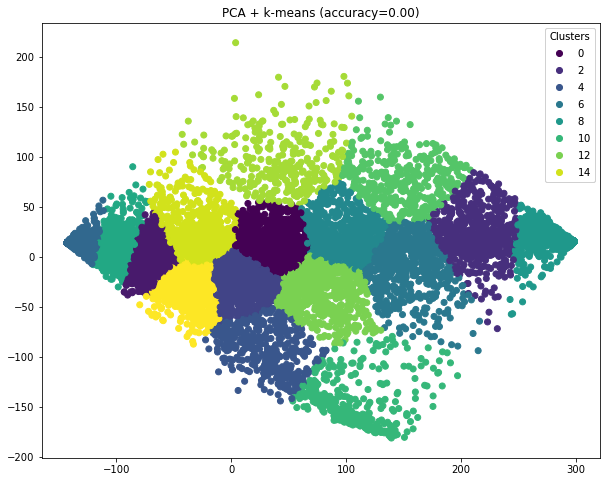

In [105]:
# Cargar los datos del archivo CSV
dfs = pd.read_csv('flowers.csv')

# Convertir la columna 'features' de cadenas de caracteres a una matriz numérica
dfs['features'] = dfs['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

# Crear una matriz numpy que contenga todas las filas de la columna 'features'
X = np.stack(dfs['features'].to_numpy())

# Aplicar PCA en dos dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Aplicar k-means en dos clusters
kmeans = KMeans(n_clusters=16)
y_pred = kmeans.fit_predict(X_pca)

# Calcular la exactitud
y_true = dfs['flower_type'].values
accuracy = np.mean(y_pred == y_true)

# Graficar el resultado
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
ax.set_title(f'PCA + k-means (accuracy={accuracy:.2f})')
plt.show()

/tmp/ipykernel_711/3577126737.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  dfs['features'] = dfs['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))


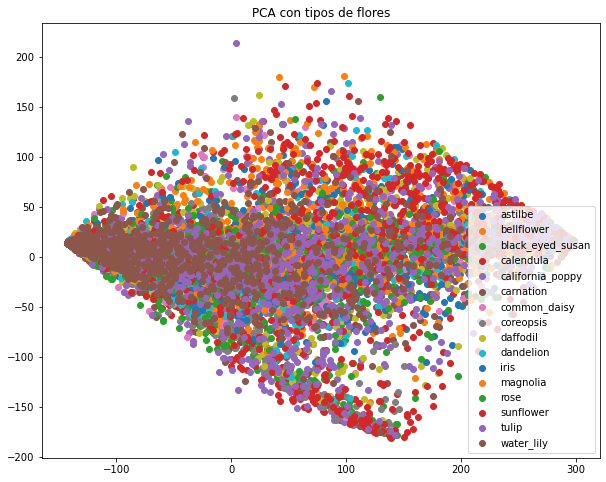

In [106]:
# Cargar los datos del archivo CSV
dfs = pd.read_csv('flowers.csv')

# Convertir la columna 'features' de cadenas de caracteres a una matriz numérica
dfs['features'] = dfs['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))


# Aplicar PCA en dos dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dfs['features'].tolist())

# Obtener los tipos de flores
types = dfs['flower_type'].unique()

# Graficar las flores con su respectivo tipo
fig, ax = plt.subplots(figsize=(10, 8))
for t in types:
    mask = dfs['flower_type'] == t
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], label=t)
ax.legend()
ax.set_title('PCA con tipos de flores')
plt.show()

## MDS

In [120]:
import random

# Seleccionar una muestra aleatoria del 10% de los datos
sample_size = int(len(dfs) * 0.1)
df_sample = dfs.sample(sample_size, random_state=42)

# Convertir la columna 'features' de cadenas de caracteres a una matriz numérica
#df_sample['features'] = df_sample['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))




In [121]:
# Aplicar MDS en dos dimensiones a la muestra
mds = MDS(n_components=2)
X_mds = mds.fit_transform(df_sample['features'].tolist())

# Aplicar k-means en dos clusters a la muestra
kmeans = KMeans(n_clusters=16)
y_pred = kmeans.fit_predict(X_mds)


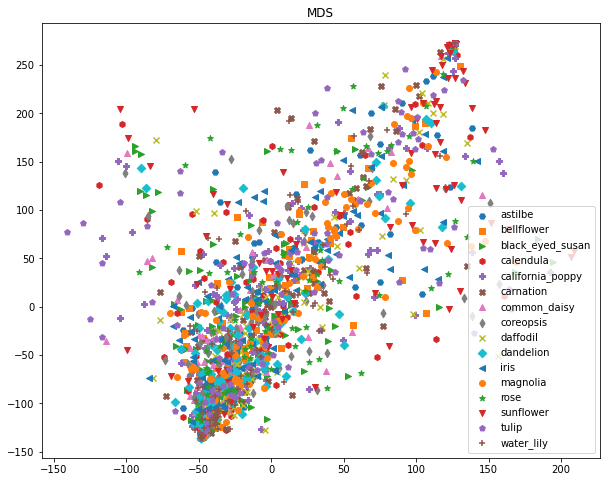

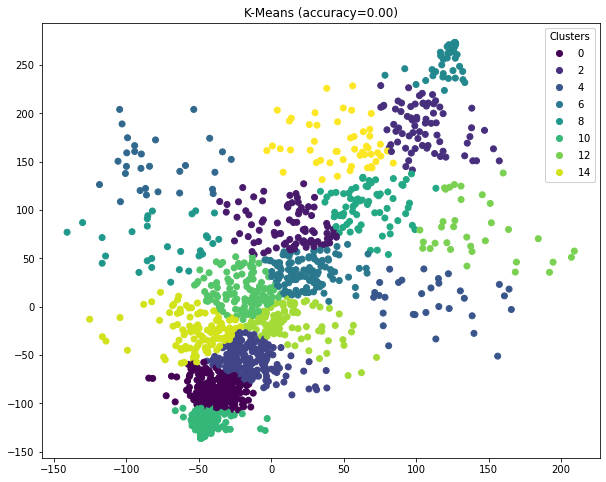

In [122]:
# Define a dictionary that maps each flower type to a specific marker shape
marker_dict = {
    'magnolia': 'o',
    'bellflower': 's',
    'dandelion': 'D',
    'california_poppy': 'P',
    'rose': '*',
    'carnation': 'X',
    'sunflower': 'v',
    'coreopsis': 'd',
    'common_daisy': '^',
    'iris': '<',
    'black_eyed_susan': '>',
    'calendula': 'h',
    'water_lily': '+',
    'daffodil': 'x',
    'astilbe': 'H',
    'tulip': 'p'
}
y_true = y_true = df_sample['flower_type'].values
# Plot each type sepdfs['flower_type'].valuesarately with the corresponding marker shape
fig, ax = plt.subplots(figsize=(10, 8))
for flower_type in np.unique(y_true):
    mask = y_true == flower_type
    ax.scatter(X_mds[:, 0][mask], X_mds[:, 1][mask], marker=marker_dict[flower_type], label=flower_type)
ax.set_title('MDS')
ax.legend()
plt.show()


# Graficar el clustering con las flores de la muestra
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_mds[:, 0], X_mds[:, 1], c=y_pred, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
ax.set_title(f'K-Means (accuracy={accuracy:.2f})')
plt.show()

## tSNE

In [ ]:
# Cargar los datos del archivo CSV
dfs = pd.read_csv('flowers.csv')

# Convertir la columna 'features' de cadenas de caracteres a una matriz numérica
dfs['features'] = dfs['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

# Aplicar t-SNE en dos dimensiones
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(dfs['features'].tolist())

# Aplicar k-means en dos clusters
kmeans = KMeans(n_clusters=16)
y_pred = kmeans.fit_predict(X_tsne)

# Calcular la exactitud
y_true = dfs['flower_type'].values
accuracy = np.mean(y_pred == y_true)


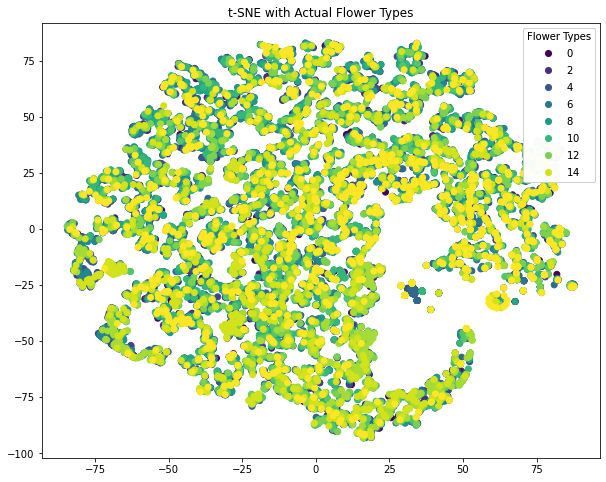

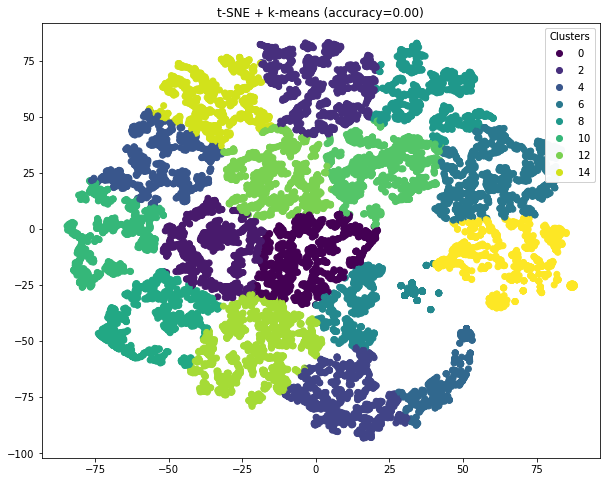

In [132]:

# # Graficar el resultado del t-SNE con las etiquetas reales de la flor
# fig, ax = plt.subplots(figsize=(10, 8))
# scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dfs['flower_type'].astype('category').cat.codes, cmap='viridis')
# legend = ax.legend(*scatter.legend_elements(),
#                     loc="upper right", title="Flower Types")
# ax.add_artist(legend)
# ax.set_title('t-SNE with Actual Flower Types')
# plt.show()

# Define a dictionary that maps each flower type to a specific marker shape
marker_dict = {
    'magnolia': 'o',
    'bellflower': 's',
    'dandelion': 'D',
    'california_poppy': 'P',
    'rose': '*',
    'carnation': 'X',
    'sunflower': 'v',
    'coreopsis': 'd',
    'common_daisy': '^',
    'iris': '<',
    'black_eyed_susan': '>',
    'calendula': 'h',
    'water_lily': '+',
    'daffodil': 'x',
    'astilbe': 'H',
    'tulip': 'p'
}



# Map flower type to corresponding marker shape
marker_shapes = dfs['flower_type'].map(marker_dict)

fig, ax = plt.subplots(figsize=(10, 8))
c = pd.Categorical(dfs['flower_type'].tolist()).codes
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=c, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Flower Types")
ax.add_artist(legend)
ax.set_title('t-SNE with Actual Flower Types')
plt.show()



# Graficar el resultado del k-means con los clusters encontrados
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
ax.set_title(f't-SNE + k-means (accuracy={accuracy:.2f})')
plt.show()